In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing 
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

`read data diabetes`

In [45]:
data = pd.read_excel('Diabetes_Classification.xlsx')
data.head()

,Patient number,Cholesterol,Glucose,LDL,HDL,Lipoprotein,Age,Gender,Weight,Height,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,16,127,100,50,63,0.793651,21,female,146.75,196,38.2,90,70,35,38,0.921053,0
1,68,130,98,54,62,0.870968,23,female,58.28,150,25.9,98,71,29,35,0.828571,0
2,32,132,98,81,0,NaN,22,female,64.58,150,28.7,100,70,33,38,0.868421,0
3,353,270,231,121,74,1.635135,54,male,105.97,174,35.0,100,94,39,41,0.951220,1
4,146,178,150,115,70,1.642857,27,male,50.90,141,25.6,100,60,40,45,0.888889,0


`menghapus variabel pasien number`

In [46]:
data = data.drop(data.columns[[0]],axis=1)

# Analisis Data Eksploratif

`check missing value dan tipe data setiap variabel`

In [47]:
print(data.info())
print('Total variabel kategorikal :',len(data.select_dtypes(include='object').columns))
print('Total variabel numerikal :',len(data.select_dtypes(exclude='object').columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cholesterol      419 non-null    int64  
 1   Glucose          419 non-null    int64  
 2   LDL              419 non-null    int64  
 3   HDL              419 non-null    int64  
 4   Lipoprotein      403 non-null    float64
 5   Age              419 non-null    int64  
 6   Gender           419 non-null    object 
 7   Weight           419 non-null    float64
 8   Height           419 non-null    int64  
 9   BMI              419 non-null    float64
 10  Systolic BP      419 non-null    int64  
 11  Diastolic BP     419 non-null    int64  
 12  waist            419 non-null    int64  
 13  hip              419 non-null    int64  
 14  Waist/hip ratio  419 non-null    float64
 15  Diabetes         419 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 52.5+ KB
Non

`plot missingvalue`

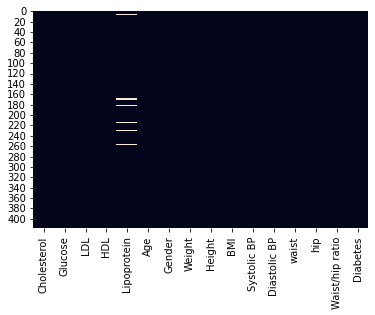

In [48]:
sns.heatmap(data.isnull(), cbar=False)

`persentase missingvalue dalam data`

In [49]:
(data.isnull().sum()*100/len(data)).sort_values(ascending=False)

Lipoprotein        3.818616
Cholesterol        0.000000
Glucose            0.000000
LDL                0.000000
HDL                0.000000
Age                0.000000
Gender             0.000000
Weight             0.000000
Height             0.000000
BMI                0.000000
Systolic BP        0.000000
Diastolic BP       0.000000
waist              0.000000
hip                0.000000
Waist/hip ratio    0.000000
Diabetes           0.000000
dtype: float64

*terdapat missing value pada variabel lipoprotein*

`check data duplikat`

In [50]:
duplicate = data[data.duplicated()].shape
 
print("Jumlah Baris yang Duplikat :",duplicate[0])

Jumlah Baris yang Duplikat : 0


*tidak terdapat data yang duplikat*

`analisis deskriptive`

In [51]:
data.describe(include = [np.number, object])

,Cholesterol,Glucose,LDL,HDL,Lipoprotein,Age,Gender,Weight,Height,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
count,419.000000,419.000000,419.000000,419.000000,403.000000,419.000000,419,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,208.964200,174.341289,102.317422,69.591885,1.445562,37.326969,NaN,93.225680,174.558473,29.961575,144.233890,91.226730,41.689737,44.494033,0.933948,0.443914
std,42.839426,43.178117,18.951511,17.078570,0.370320,13.911735,NaN,33.250447,22.573713,5.882590,34.209637,24.051851,9.750189,6.809917,0.143046,0.497438
min,98.000000,60.000000,49.000000,0.000000,0.471698,21.000000,NaN,0.000000,105.000000,0.000000,90.000000,60.000000,27.000000,30.000000,0.681818,0.000000
25%,179.500000,140.500000,93.000000,66.000000,1.201266,25.000000,NaN,66.415000,161.000000,26.150000,123.500000,78.000000,35.000000,40.000000,0.850532,0.000000
50%,202.000000,168.000000,103.000000,72.000000,1.408451,33.000000,NaN,85.140000,172.000000,30.700000,136.000000,86.000000,39.000000,43.000000,0.900000,0.000000
75%,230.000000,200.000000,116.000000,78.000000,1.653846,49.000000,NaN,115.670000,188.000000,34.150000,150.000000,96.000000,45.000000,48.000000,0.968455,1.000000


`membagi data tipe kategorik dan numerik`

In [52]:
numerik_data = data.select_dtypes(include=[np.number])
diabetes = numerik_data['Diabetes']
numerik_data.drop('Diabetes',axis=1,inplace=True)

kategorik_data = data.select_dtypes(exclude=[np.number])
kategorik_data = pd.concat([kategorik_data,diabetes],axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


`check class variabel kategorik`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


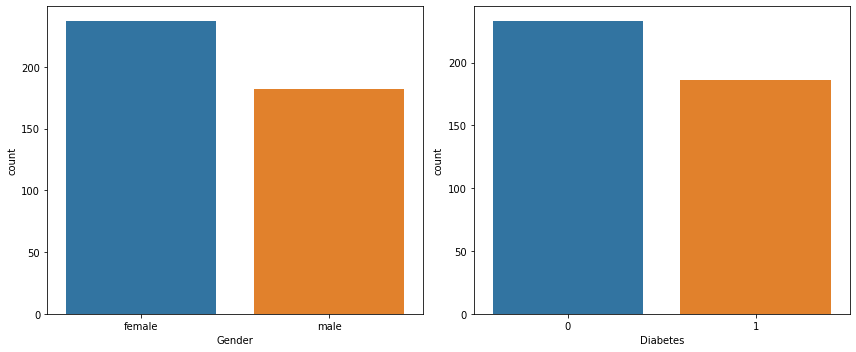

In [53]:
plt.figure(figsize=(12,5))
for i in range(0,len(kategorik_data.columns)):
  plt.subplot(1,2,i+1)
  sns.countplot(kategorik_data[kategorik_data.columns[i]])
  plt.tight_layout()

`check noise/outlier variabel numerik`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

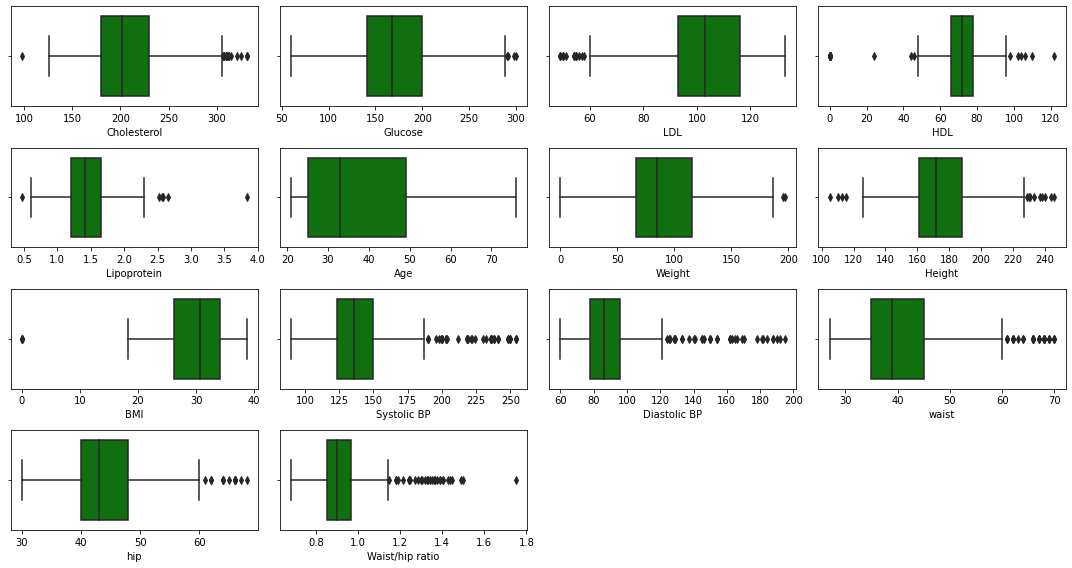

In [54]:
plt.figure(figsize=(15,8))
for i in range(0,len(numerik_data.columns)):
  plt.subplot(4,4,i+1)
  sns.boxplot(numerik_data[numerik_data.columns[i]],color='green',orient="v")
  plt.tight_layout()

`persentase outlier`

In [55]:
outliers=[]
def deteksi_outlier(data):
    x = np.array(data)
    x_mean = np.mean(data)
    x_sd = np.std(data)
    y = x[abs(x - x_mean)>2*x_sd]
    return y

col = numerik_data.columns
outliers_var = []
for i in col:
   x = deteksi_outlier(numerik_data[i])
   x = (len(x)*100/len(numerik_data[i]))
   x = round(x,2)
   outliers_var.append(x)


df = pd.DataFrame(list(zip(col, outliers_var)),columns =['Variabel', 'Persentase Outlier'])
df

,Variabel,Persentase Outlier
0,Cholesterol,6.68
1,Glucose,4.06
2,LDL,5.49
3,HDL,5.01
4,Lipoprotein,3.58
5,Age,3.58
6,Weight,4.77
7,Height,6.44
8,BMI,1.67
9,Systolic BP,7.88


`check distribusi variabel numerik`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

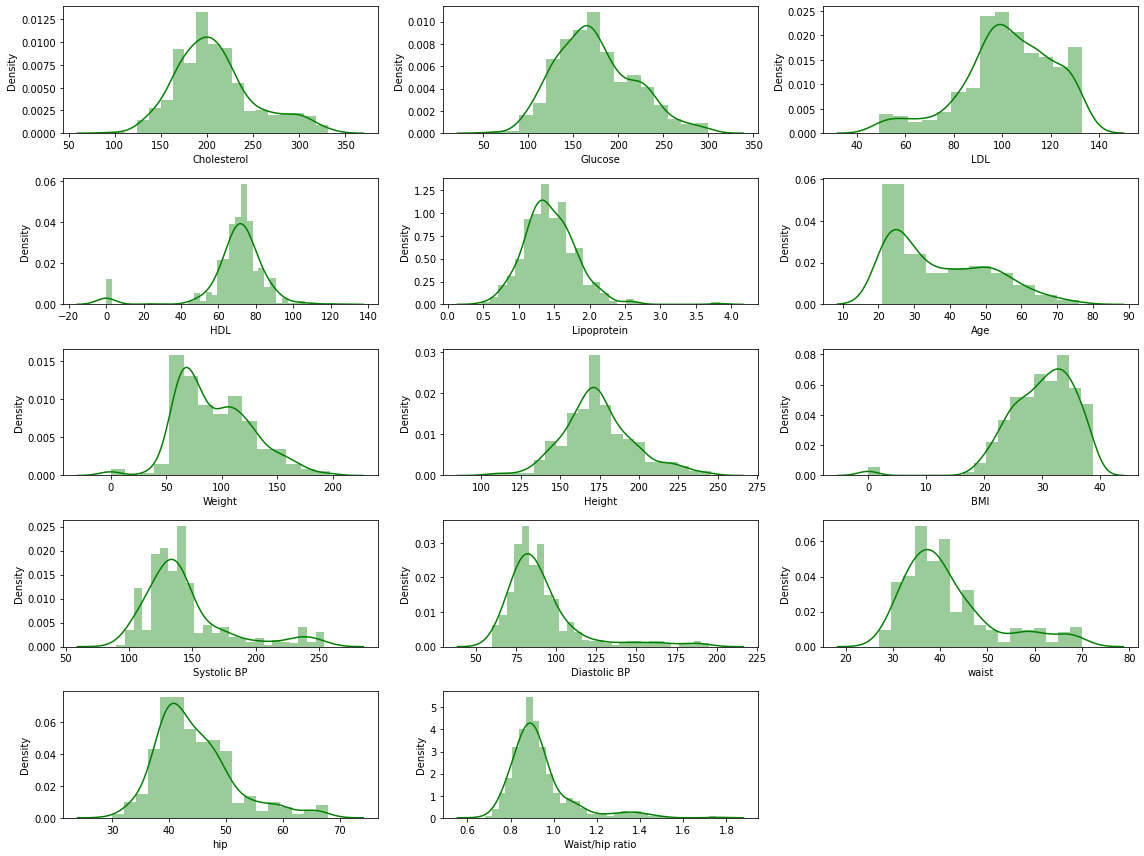

In [56]:
plt.figure(figsize=(16,12))
for i in range(0,len(numerik_data.columns)):
  plt.subplot(5,3,i+1)
  sns.distplot(numerik_data[numerik_data.columns[i]],color='green')
  plt.tight_layout()

`check korelasi`

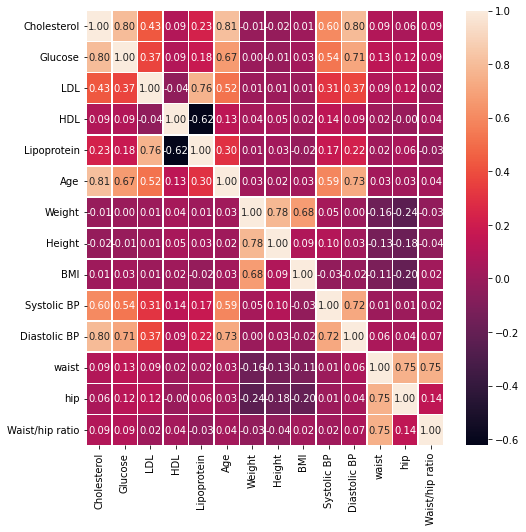

In [57]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(numerik_data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

`check multikolinearitas`

In [58]:
numerik_data.corr()

,Cholesterol,Glucose,LDL,HDL,Lipoprotein,Age,Weight,Height,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio
Cholesterol,1.000000,0.797359,0.431314,0.090140,0.228485,0.814115,-0.012042,-0.016685,0.012911,0.600747,0.797041,0.090182,0.061433,0.092791
Glucose,0.797359,1.000000,0.366748,0.092094,0.177081,0.667308,0.002850,-0.011327,0.033934,0.535930,0.709978,0.133878,0.117985,0.093639
LDL,0.431314,0.366748,1.000000,-0.037487,0.760194,0.520208,0.010071,0.005624,0.007432,0.313306,0.373112,0.086437,0.123424,0.015117
HDL,0.090140,0.092094,-0.037487,1.000000,-0.623300,0.133989,0.043756,0.049007,0.017912,0.136714,0.090638,0.019380,-0.003302,0.037737
Lipoprotein,0.228485,0.177081,0.760194,-0.623300,1.000000,0.302111,0.014854,0.033214,-0.020898,0.173777,0.224764,0.021850,0.060708,-0.027637
Age,0.814115,0.667308,0.520208,0.133989,0.302111,1.000000,0.028077,0.019361,0.033404,0.588948,0.726469,0.032267,0.027129,0.038897
Weight,-0.012042,0.002850,0.010071,0.043756,0.014854,0.028077,1.000000,0.779284,0.676001,0.046695,0.004008,-0.163966,-0.240017,-0.027439
Height,-0.016685,-0.011327,0.005624,0.049007,0.033214,0.019361,0.779284,1.000000,0.086194,0.095188,0.028284,-0.131036,-0.176753,-0.039118
BMI,0.012911,0.033934,0.007432,0.017912,-0.020898,0.033404,0.676001,0.086194,1.000000,-0.028420,-0.020707,-0.112275,-0.201286,0.024417
Systolic BP,0.600747,0.535930,0.313306,0.136714,0.173777,0.588948,0.046695,0.095188,-0.028420,1.000000,0.719553,0.009972,0.009700,0.022785


*asumsi : hubungan tergolong kuat jika korelasi >= 0.7*

***dari uji korelasi antar variabel numerik didapatkan;***


1. var `Cholesterol` memiliki korelasi kuat terhadap var `Glucose`,`Age`,`Diastolic BP` dan korelasi cukup terhadap variabel `Systolic BP`
2. var `Glucose` memiliki korelasi kuat terhadap var `Cholesterol` dan `Diastolic BP` dan korelasi cukup terhadap variabel `Age`
4. var `Lipoprotein` memiliki korelasi kuat terhadap variabel `LDL`
5. var `Age` memiliki korelasi kuat terhadap var `Cholesterol` dan `Diastolic BP` dan korelasi cukup terhadap variabel `Glucose`,`LDL`,`Systolic BP`
6. var `Weight` memiliki korelasi kuat terhadap var `Height` dan korelasi cukup terhadap variabel `BMI`
7. var `Height` memiliki korelasi kuat terhadap var `Weight`
8. var `BMI` memiliki korelasi cukup terhadap var `Weight`
9. var `Systolic BP` memiliki korelasi kuat terhadap var `Diastolic BP` dan memiliki korelasi cukup terhadap var `Cholesterol`,`Glucose`,`Age` 
10. var `Diastolic BP` memiliki korelasi kuat terhadap var `Cholesterol`,`Glucose`, `Age` dan `Systolic BP`
11. var `waist` memiliki korelasi kuat terhadap var `hip` dan `waist/hip ratio`
12. var `hip` memiliki korelasi kuat terhadap var dan `waist`
13. var `waist/hip ratio` memiliki korelasi kuat terhadap variabel `waist`


**maka semua variabel kecuali var `HDL` terkena multiokolinearitas**

# Data Preprocessing

`mengisi data hilang dengan nilai median variabel`

In [59]:
numerik_data['Lipoprotein'].fillna(numerik_data['Lipoprotein'].median(), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


syarat PCA; *hapus variabel yang tidak terjadi multikolinearitas (HDL)*

`memilih variabel yang memiliki korelasi tinggi (>=0,7)`

In [60]:
#feature selection
num = numerik_data.drop(numerik_data.columns[[3]],axis=1)
num.head()

,Cholesterol,Glucose,LDL,Lipoprotein,Age,Weight,Height,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio
0,127,100,50,0.793651,21,146.75,196,38.2,90,70,35,38,0.921053
1,130,98,54,0.870968,23,58.28,150,25.9,98,71,29,35,0.828571
2,132,98,81,1.408451,22,64.58,150,28.7,100,70,33,38,0.868421
3,270,231,121,1.635135,54,105.97,174,35.0,100,94,39,41,0.951220
4,178,150,115,1.642857,27,50.90,141,25.6,100,60,40,45,0.888889


In [61]:
from sklearn.preprocessing import OneHotEncoder

#one-hot encoding
cat = kategorik_data['Gender']
cat = pd.get_dummies(cat)

#menggabungkan data kategori dan numerik
cat = pd.concat([cat,kategorik_data['Diabetes']],axis=1)
dataset = pd.concat([num,cat],axis=1)
dataset.head()

,Cholesterol,Glucose,LDL,Lipoprotein,Age,Weight,Height,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,female,male,Diabetes
0,127,100,50,0.793651,21,146.75,196,38.2,90,70,35,38,0.921053,1,0,0
1,130,98,54,0.870968,23,58.28,150,25.9,98,71,29,35,0.828571,1,0,0
2,132,98,81,1.408451,22,64.58,150,28.7,100,70,33,38,0.868421,1,0,0
3,270,231,121,1.635135,54,105.97,174,35.0,100,94,39,41,0.951220,0,1,1
4,178,150,115,1.642857,27,50.90,141,25.6,100,60,40,45,0.888889,0,1,0


`standarisasi data`

In [62]:
from sklearn.preprocessing import StandardScaler

col = dataset.drop('Diabetes',axis=1).select_dtypes(exclude='uint8').columns

#standarisasi
stdSc = StandardScaler()
dataset.loc[:, col] = stdSc.fit_transform(dataset.loc[:, col])
dataset.head()

,Cholesterol,Glucose,LDL,Lipoprotein,Age,Weight,Height,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,female,male,Diabetes
0,-1.915576,-1.723794,-2.763894,-1.792986,-1.175014,1.611657,0.950980,1.402150,-1.587235,-0.883595,-0.686934,-0.954754,-0.090256,1,0,0
1,-1.845464,-1.770169,-2.552577,-1.579874,-1.031079,-1.052240,-1.089224,-0.691265,-1.353103,-0.841969,-1.303042,-1.395815,-0.737541,1,0,0
2,-1.798722,-1.770169,-1.126185,-0.098386,-1.103047,-0.862543,-1.089224,-0.214716,-1.294570,-0.883595,-0.892303,-0.954754,-0.458630,1,0,0
3,1.426461,1.313778,0.986988,0.526434,1.199920,0.383741,-0.024770,0.857522,-1.294570,0.115442,-0.276195,-0.513694,0.120884,0,1,1
4,-0.723661,-0.564415,0.670012,0.547719,-0.743208,-1.274457,-1.488394,-0.742324,-1.294570,-1.299861,-0.173510,0.074387,-0.315373,0,1,0


# PCA

In [63]:
from sklearn.decomposition import PCA

data_pca = dataset.drop('Diabetes',axis = 1)
pca = PCA().fit(data_pca)
print(pca.explained_variance_ratio_)

[3.14604359e-01 1.83963978e-01 1.30251476e-01 1.05332567e-01
 7.10076243e-02 6.34461839e-02 3.67225580e-02 2.99949701e-02
 2.32730384e-02 1.69971842e-02 1.34377589e-02 1.00242678e-02
 7.24827840e-04 2.19206586e-04 5.54257665e-34]


`Matriks Kovarian`

In [64]:
cov_mat= data_pca.cov()
cov_mat

,Cholesterol,Glucose,LDL,Lipoprotein,Age,Weight,Height,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,female,male
Cholesterol,1.002392,0.799266,0.432346,0.224505,0.816063,-0.012071,-0.016725,0.012942,0.602185,0.798948,0.090398,0.061580,0.093013,-0.000867,0.000867
Glucose,0.799266,1.002392,0.367626,0.173726,0.668904,0.002857,-0.011354,0.034015,0.537212,0.711677,0.134199,0.118267,0.093863,0.009381,-0.009381
LDL,0.432346,0.367626,1.002392,0.752214,0.521452,0.010095,0.005638,0.007449,0.314056,0.374004,0.086644,0.123720,0.015154,0.047113,-0.047113
Lipoprotein,0.224505,0.173726,0.752214,1.002392,0.298411,0.015394,0.033799,-0.021032,0.174492,0.223177,0.021215,0.058845,-0.027049,0.070822,-0.070822
Age,0.816063,0.668904,0.521452,0.298411,1.002392,0.028144,0.019407,0.033483,0.590357,0.728207,0.032345,0.027194,0.038990,0.007663,-0.007663
Weight,-0.012071,0.002857,0.010095,0.015394,0.028144,1.002392,0.781148,0.677619,0.046807,0.004017,-0.164358,-0.240592,-0.027504,0.006355,-0.006355
Height,-0.016725,-0.011354,0.005638,0.033799,0.019407,0.781148,1.002392,0.086401,0.095416,0.028351,-0.131349,-0.177175,-0.039211,0.002296,-0.002296
BMI,0.012942,0.034015,0.007449,-0.021032,0.033483,0.677619,0.086401,1.002392,-0.028488,-0.020757,-0.112544,-0.201768,0.024475,0.003627,-0.003627
Systolic BP,0.602185,0.537212,0.314056,0.174492,0.590357,0.046807,0.095416,-0.028488,1.002392,0.721275,0.009996,0.009723,0.022840,-0.020125,0.020125
Diastolic BP,0.798948,0.711677,0.374004,0.223177,0.728207,0.004017,0.028351,-0.020757,0.721275,1.002392,0.063599,0.042621,0.066550,0.014964,-0.014964


`Nilai Eigen dan Vektor Eigen`

In [65]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

x = eigen_vals
y = eigen_vecs

print('Nilai Eigen :')
for i in x:
  print(round(i,3))

print('\nVektor Eigen :')
print(np.round(y,3))

Nilai Eigen :
4.255
2.488
1.761
1.424
0.96
0.858
0.497
0.406
0.315
0.23
0.136
0.182
0.003
0.01
-0.0

Vektor Eigen :
[[-0.437 -0.02  -0.033  0.174 -0.052  0.043  0.288 -0.026 -0.077 -0.148
   0.81  -0.065  0.01   0.002 -0.   ]
 [-0.401  0.002  0.011  0.191 -0.035  0.14   0.391 -0.045  0.642  0.325
  -0.298 -0.138 -0.007  0.01   0.   ]
 [-0.31  -0.003 -0.032 -0.564 -0.106 -0.097  0.021 -0.16  -0.121  0.459
   0.055  0.557  0.004 -0.001  0.   ]
 [-0.213 -0.021 -0.056 -0.685 -0.073 -0.175 -0.089  0.083  0.271 -0.406
  -0.015 -0.438 -0.005 -0.003  0.   ]
 [-0.424 -0.061 -0.051  0.054 -0.054  0.012  0.195 -0.084 -0.686  0.02
  -0.41  -0.349  0.003  0.004 -0.   ]
 [-0.002 -0.485  0.471 -0.058  0.075  0.114  0.001 -0.047 -0.003 -0.033
   0.01   0.013 -0.07   0.716  0.   ]
 [-0.008 -0.382  0.352 -0.067  0.619 -0.188  0.163 -0.019 -0.007  0.011
   0.009  0.006  0.042 -0.528 -0.   ]
 [ 0.002 -0.333  0.346  0.    -0.624  0.38  -0.177 -0.036  0.01  -0.035
   0.004 -0.007  0.04  -0.447 -0.   ]
 [-0.

`Proporsi Varian screeplot`

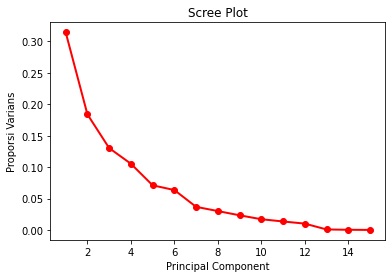

In [66]:
PC_komponen = np.arange(pca.n_components_) + 1
plt.plot(PC_komponen, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proporsi Varians')
plt.show()

`Proporsi Kumulatif Varians`

In [67]:
for i in range(1,len(pca.explained_variance_ratio_)+1):
  pca = PCA(i).fit(data_pca)
  print('variansi data {} komponen utama sebesar {}'.format(i,sum(pca.explained_variance_ratio_)))

variansi data 1 komponen utama sebesar 0.31460435908193746
variansi data 2 komponen utama sebesar 0.49856833708573167
variansi data 3 komponen utama sebesar 0.6288198133938727
variansi data 4 komponen utama sebesar 0.7341523799409411
variansi data 5 komponen utama sebesar 0.8051600042627594
variansi data 6 komponen utama sebesar 0.8686061881830495
variansi data 7 komponen utama sebesar 0.9053287461480779
variansi data 8 komponen utama sebesar 0.9353237162877793
variansi data 9 komponen utama sebesar 0.9585967546406426
variansi data 10 komponen utama sebesar 0.975593938844034
variansi data 11 komponen utama sebesar 0.9890316977766509
variansi data 12 komponen utama sebesar 0.9990559655736114
variansi data 13 komponen utama sebesar 0.9997807934136509
variansi data 14 komponen utama sebesar 0.9999999999999999
variansi data 15 komponen utama sebesar 0.9999999999999999


`memilih K = 7`

In [68]:
#jumlah komponen (jika n = 6 maka jlh komponen = 7)
#karena iterasi dimulai dari 0
n = 6

var_ratio = []
for i in range(0,n+1):
  var_ratio.append(pca.explained_variance_ratio_[i])

print(var_ratio)

[0.31460435908193746, 0.1839639780037942, 0.13025147630814105, 0.10533256654706835, 0.0710076243218183, 0.06344618392029014, 0.03672255796502844]


*`membentuk data komponen utama untuk machine learning`*

In [69]:
# memanggil model fungsi PCA dan jumlah komponen
pca = PCA(n_components=7)

#memasukkan data ke dalam model PCA
pca_data = pca.fit_transform(dataset)

#melihat data yang sudah direduksi
data_pca = pd.DataFrame(data = pca_data, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6','PC 7'])
data_pca.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7
0,-4.343893,-2.060997,1.349874,-1.512531,-0.070355,0.620289,-0.138196
1,-4.190039,0.000186,-2.098736,-1.570835,-0.215463,-0.087044,-0.031053
2,-3.374066,0.181867,-1.519416,0.293745,-0.677633,-0.179949,0.244420
3,1.656517,-0.807858,0.182833,0.352213,-1.373215,-0.107429,-1.981749
4,-1.651218,1.480928,-1.454666,1.295208,-0.879499,-0.430633,-0.366356


`melihat kontribusi variabel awal terhadap komponen utama`

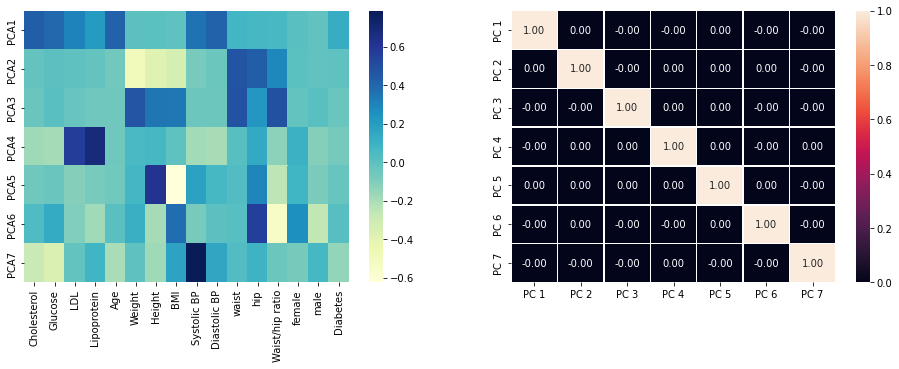

In [70]:
plt.figure(figsize=(16,5))
pca = PCA(n_components=7).fit(dataset)

ax = plt.subplot(121)
sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(dataset.columns),
                 cbar_kws={"orientation": "vertical"},ax=ax)

ax = plt.subplot(122)
sns.heatmap(data_pca.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

In [71]:
bobot = np.round(pca.components_,3)
df = pd.DataFrame(data = bobot, columns = dataset.columns)
df.T

,0,1,2,3,4,5,6
Cholesterol,0.436,-0.019,-0.033,-0.170,-0.051,0.042,-0.282
Glucose,0.398,0.002,0.012,-0.186,-0.033,0.139,-0.356
LDL,0.305,-0.003,-0.026,0.567,-0.107,-0.097,-0.014
Lipoprotein,0.208,-0.021,-0.050,0.687,-0.075,-0.175,0.083
Age,0.422,-0.061,-0.050,-0.050,-0.053,0.011,-0.198
Weight,0.001,-0.484,0.471,0.054,0.074,0.115,-0.003
Height,0.007,-0.382,0.353,0.066,0.618,-0.185,-0.168
BMI,-0.003,-0.333,0.345,-0.005,-0.625,0.378,0.180
Systolic BP,0.357,-0.077,-0.041,-0.183,0.182,-0.075,0.787
Diastolic BP,0.421,-0.039,-0.044,-0.190,0.068,0.004,0.161


#Partisi Data

`split variabel X dan y`

In [72]:
X = dataset.drop('Diabetes',axis=1)
y = dataset['Diabetes']

`split data train dan data test`

In [73]:
from sklearn.model_selection import train_test_split

#with PCA
X_train,X_test,y_train,y_test = train_test_split(data_pca,y,test_size=0.3,random_state=123)

#without PCA
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.3,random_state=123)

In [74]:
print('jumlah baris data train',X_train.shape)
print('jumlah baris data test',X_test.shape)

jumlah baris data train (293, 7)
jumlah baris data test (126, 7)


In [75]:
pip install graphviz

#Model Decision Tree C4.5

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
import graphviz

`model untuk data pca`

In [77]:
pca_DT = DecisionTreeClassifier()
pca_DT.fit(X_train,y_train)
print('jumlah simpul :',pca_DT.tree_.node_count)
print('jumlah cabang :',pca_DT.tree_.max_depth)

jumlah simpul : 107
jumlah cabang : 10


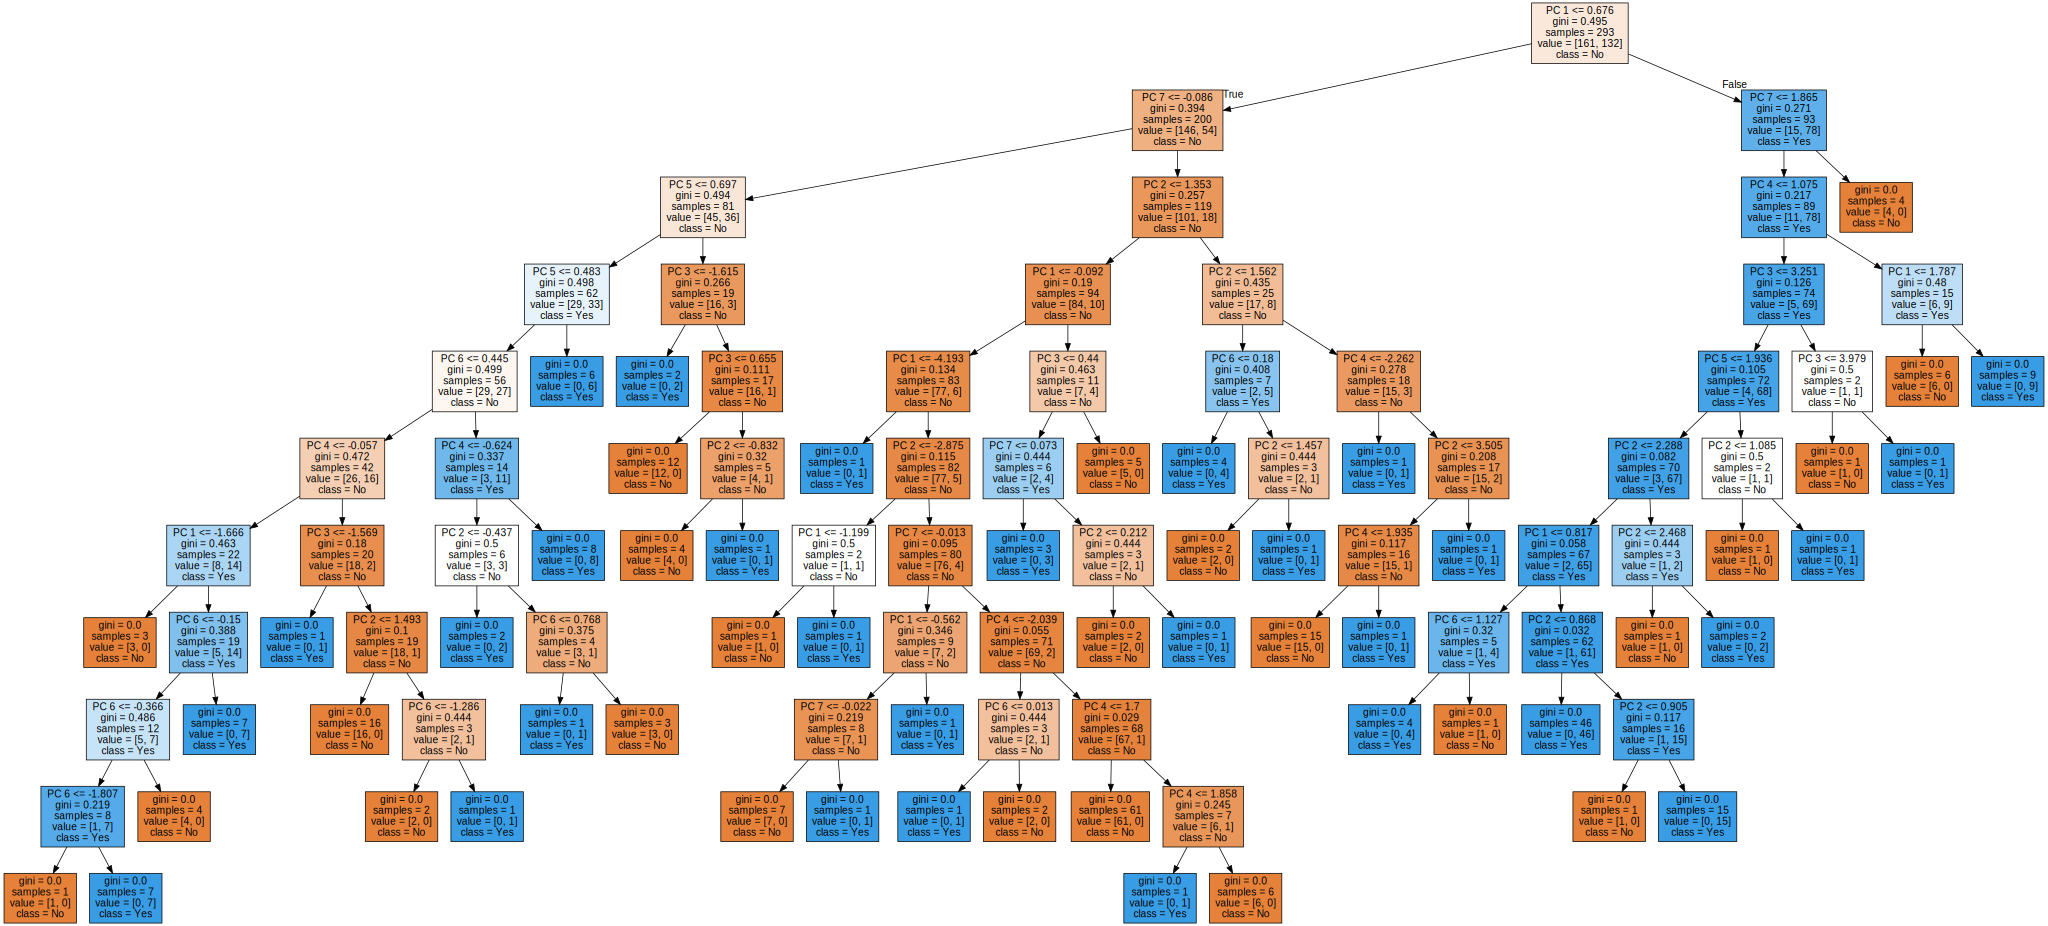

In [78]:
viz_pca_tree = tree.export_graphviz(pca_DT, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names= ['No','Yes'],
                                filled=True)

graph = graphviz.Source(viz_pca_tree, format="png") 
graph

`model untuk data non pca`

In [79]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train2,y_train2)
print('jumlah simpul :',model_DT.tree_.node_count)
print('jumlah cabang :',model_DT.tree_.max_depth)

jumlah simpul : 89
jumlah cabang : 10


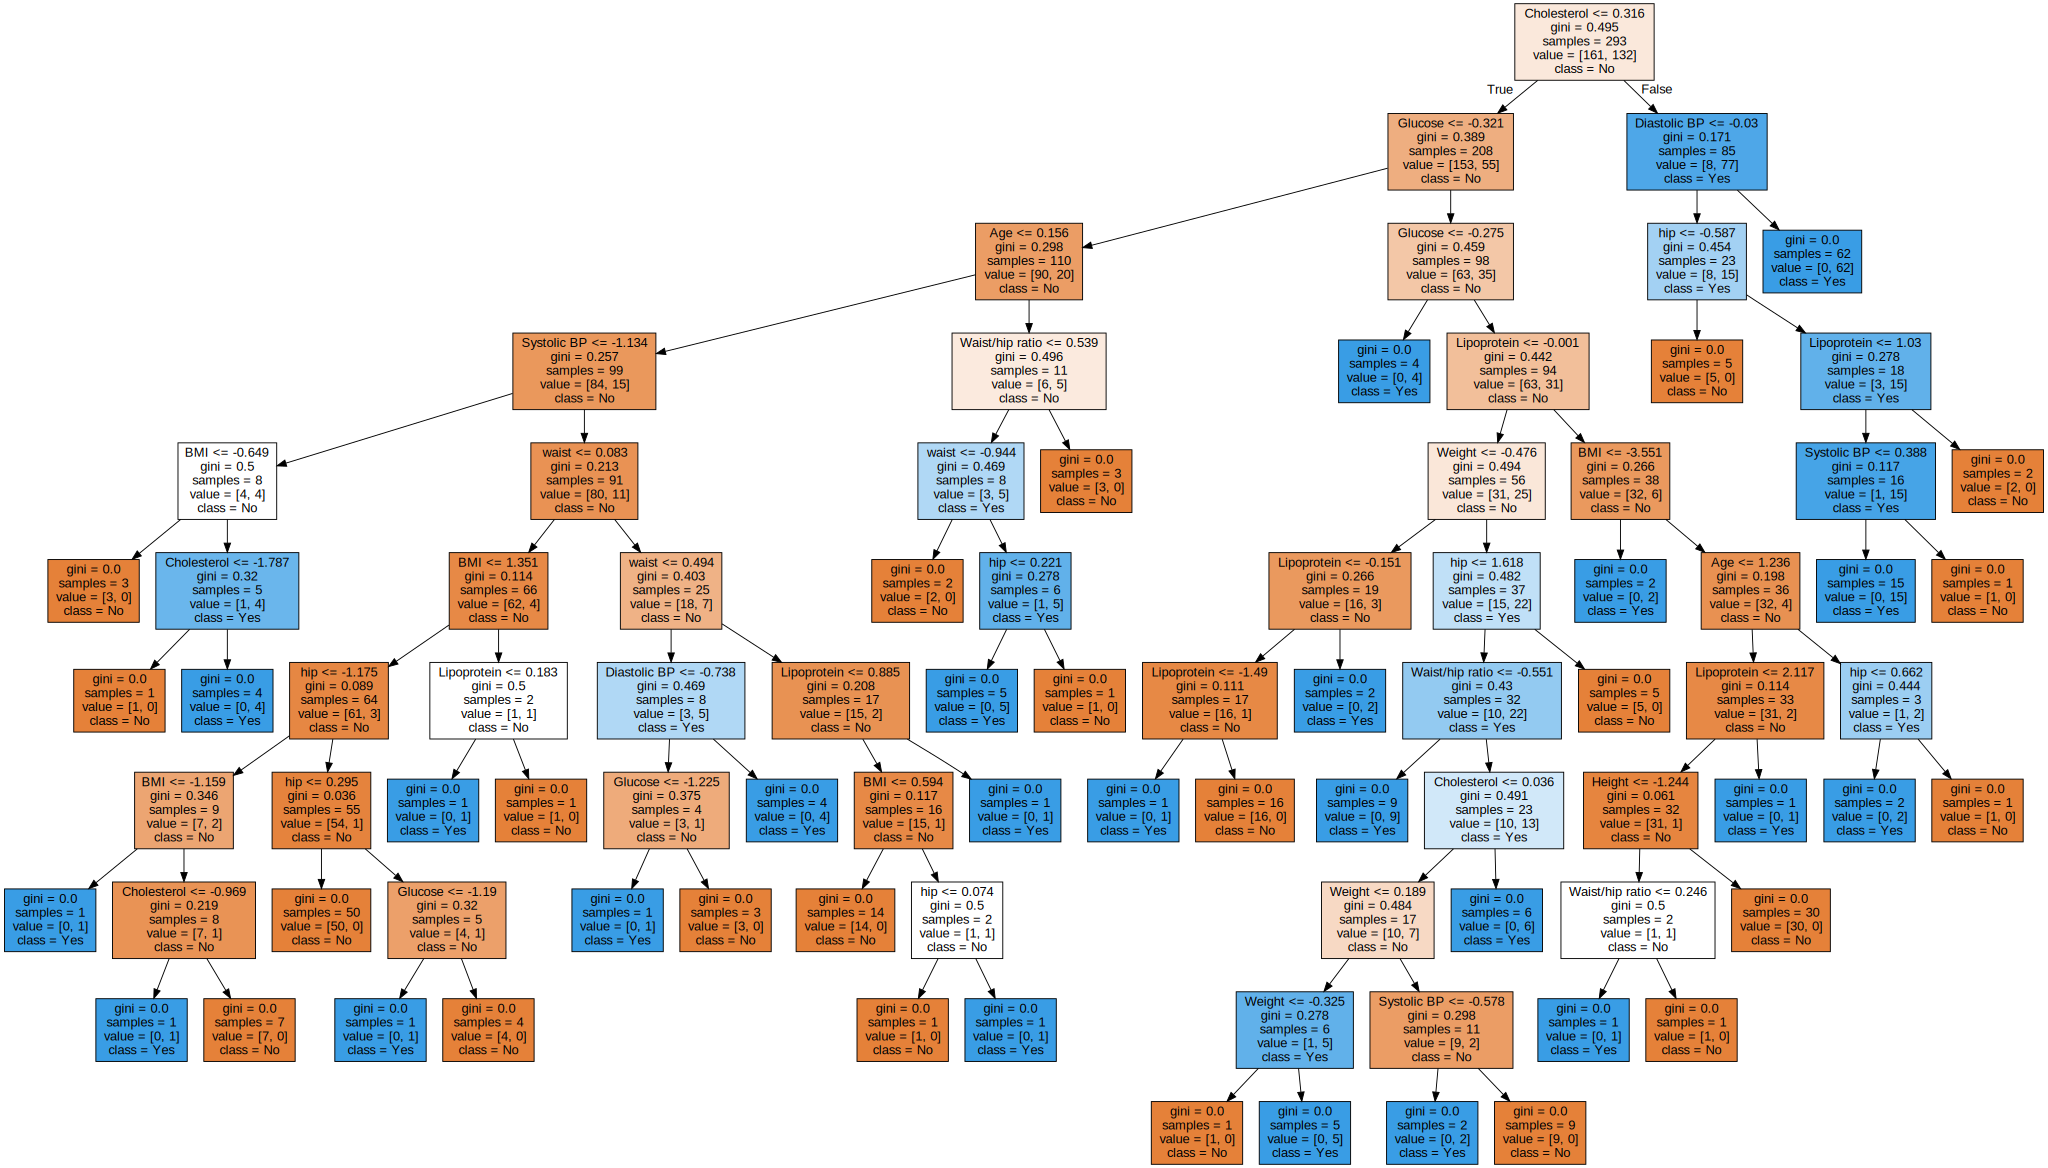

In [80]:
viz_nonpca_tree = tree.export_graphviz(model_DT, out_file=None, 
                                feature_names=X_train2.columns,  
                                class_names= ['No','Yes'],
                                filled=True)

graph2 = graphviz.Source(viz_nonpca_tree, format="png") 
graph2

`perbandingan akurasi model dengan teknik cross validasi`

In [81]:
scores = cross_val_score(pca_DT, X_train, y_train, cv=5) #use 5 folds
print(scores)

print("Average Cross Validation Accuracy: %0.2f " % (scores.mean()))

[0.77966102 0.72881356 0.76271186 0.63793103 0.68965517]
Average Cross Validation Accuracy: 0.72 


In [82]:
scores = cross_val_score(model_DT, X_train2, y_train2, cv=5) #use 5 folds
print(scores)

print("Average Cross Validation Accuracy: %0.2f " % (scores.mean()))

[0.6779661  0.69491525 0.6779661  0.5862069  0.62068966]
Average Cross Validation Accuracy: 0.65 


#Evaluasi Model

##with PCA

Training set accuracy:  1.0
Test set accuracy:  0.7063492063492064

              precision    recall  f1-score   support

           0       0.75      0.74      0.74        72
           1       0.65      0.67      0.66        54

    accuracy                           0.71       126
   macro avg       0.70      0.70      0.70       126
weighted avg       0.71      0.71      0.71       126



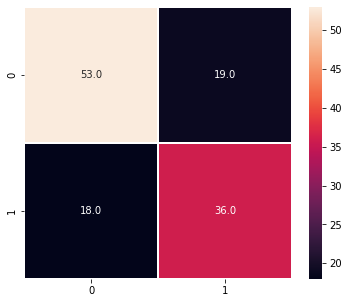

In [83]:
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics

y_pred_train = pca_DT.predict(X_train)
y_pred_test = pca_DT.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_pred_train))
print('Test set accuracy: ', accuracy_score(y_test, y_pred_test))
print('')

cm_pca = metrics.confusion_matrix(y_test, y_pred_test)
f,ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm_pca, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

#Clasification report
results_PCA = metrics.classification_report(y_test, y_pred_test)
print(results_PCA)

In [84]:
TP = cm_pca[0,0] #true positif
TN = cm_pca[1,1] #true negatif
FP = cm_pca[0,1] #false positif
FN = cm_pca[1,0] #false negatif

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Akurasi Klasifikasi : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('\nKesalahan Klasifikasi : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('\nPresisi : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('\nSensitivitas : {0:0.4f}'.format(recall))

Akurasi Klasifikasi : 0.7063

Kesalahan Klasifikasi : 0.2937

Presisi : 0.7361

Sensitivitas : 0.7465


##without PCA

Training set accuracy:  1.0
Test set accuracy:  0.6349206349206349

              precision    recall  f1-score   support

           0       0.72      0.60      0.65        72
           1       0.56      0.69      0.62        54

    accuracy                           0.63       126
   macro avg       0.64      0.64      0.63       126
weighted avg       0.65      0.63      0.64       126



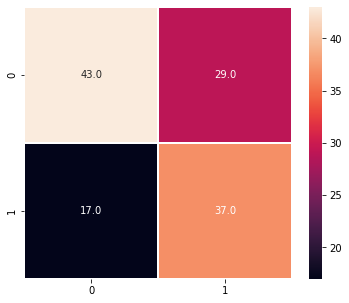

In [85]:
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics

y_pred_train = model_DT.predict(X_train2)
y_pred_test = model_DT.predict(X_test2)

print('Training set accuracy: ', accuracy_score(y_train2, y_pred_train))
print('Test set accuracy: ', accuracy_score(y_test2, y_pred_test))
print('')

cm_dt = metrics.confusion_matrix(y_test2, y_pred_test)
f,ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

#Clasification report
results_DT = metrics.classification_report(y_test2, y_pred_test)
print(results_DT)

In [86]:
TP = cm_dt[0,0] #true positif
TN = cm_dt[1,1] #true negatif
FP = cm_dt[0,1] #false positif
FN = cm_dt[1,0] #false negatif

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Akurasi Klasifikasi : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('\nKesalahan Klasifikasi : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('\nPresisi : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('\nSensitivitas : {0:0.4f}'.format(recall))

Akurasi Klasifikasi : 0.6349

Kesalahan Klasifikasi : 0.3651

Presisi : 0.5972

Sensitivitas : 0.7167
